Часть I: Исследование поведения характеристик графов
Распределения: Парето (α), Экспоненциальное (λ)
Фичи: KNN → num_components; Дистанционный → clique_cover_number

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from src.graph_builders import build_knn_graph, build_distance_graph
from src.features import compute_feature
from src.simulation import simulate_sample
from tqdm.notebook import tqdm

# Параметры выборки и графа
n = 100
simulations = 100
k = 5        # для KNN-графа
d = 1.5      # для дистанционного графа

# Параметры распределений
alpha0 = 3.0                   # для распределения Парето
lambda0 = 2.0 / np.sqrt(3.0)   # для экспоненциального распределения

# Диапазоны параметров: α для Парето, λ для экспоненциального
pareto_alphas = np.linspace(0.5, 8.0, 100)
exp_lambdas   = np.linspace(0.5, 8.0, 100)


In [3]:
#Сбор данных для Парето (α)

pareto_knn_num_components = []
pareto_dist_ccover  = []

for alpha in tqdm(pareto_alphas, desc="Парето (α)"):
    acc_num_components = 0.0
    acc_ccover  = 0.0
    for _ in range(simulations):
        sample_p = simulate_sample(n, "pareto", {"alpha": alpha})

        G_knn = build_knn_graph(sample_p, k)
        acc_num_components += compute_feature(G_knn, "num_components")

        G_dist = build_distance_graph(sample_p, d)
        acc_ccover  += compute_feature(G_dist, "clique_cover_number")

    pareto_knn_num_components.append(acc_num_components / simulations)
    pareto_dist_ccover.append(acc_ccover / simulations)


Парето (α):   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
#Сбор данных для экспоненциального (λ)

exp_knn_num_components = []
exp_dist_ccover  = []

for lam in tqdm(exp_lambdas, desc="Экспоненциальное (λ)"):
    acc_num_components = 0.0
    acc_ccover  = 0.0
    for _ in range(simulations):
        sample_e = simulate_sample(n, "exponential", {"lam": lam})

        G_knn = build_knn_graph(sample_e, k)
        acc_num_components += compute_feature(G_knn, "num_components")

        G_dist = build_distance_graph(sample_e, d)
        acc_ccover  += compute_feature(G_dist, "clique_cover_number")

    exp_knn_num_components.append(acc_num_components / simulations)
    exp_dist_ccover.append(acc_ccover / simulations)


Экспоненциальное (λ):   0%|          | 0/100 [00:00<?, ?it/s]

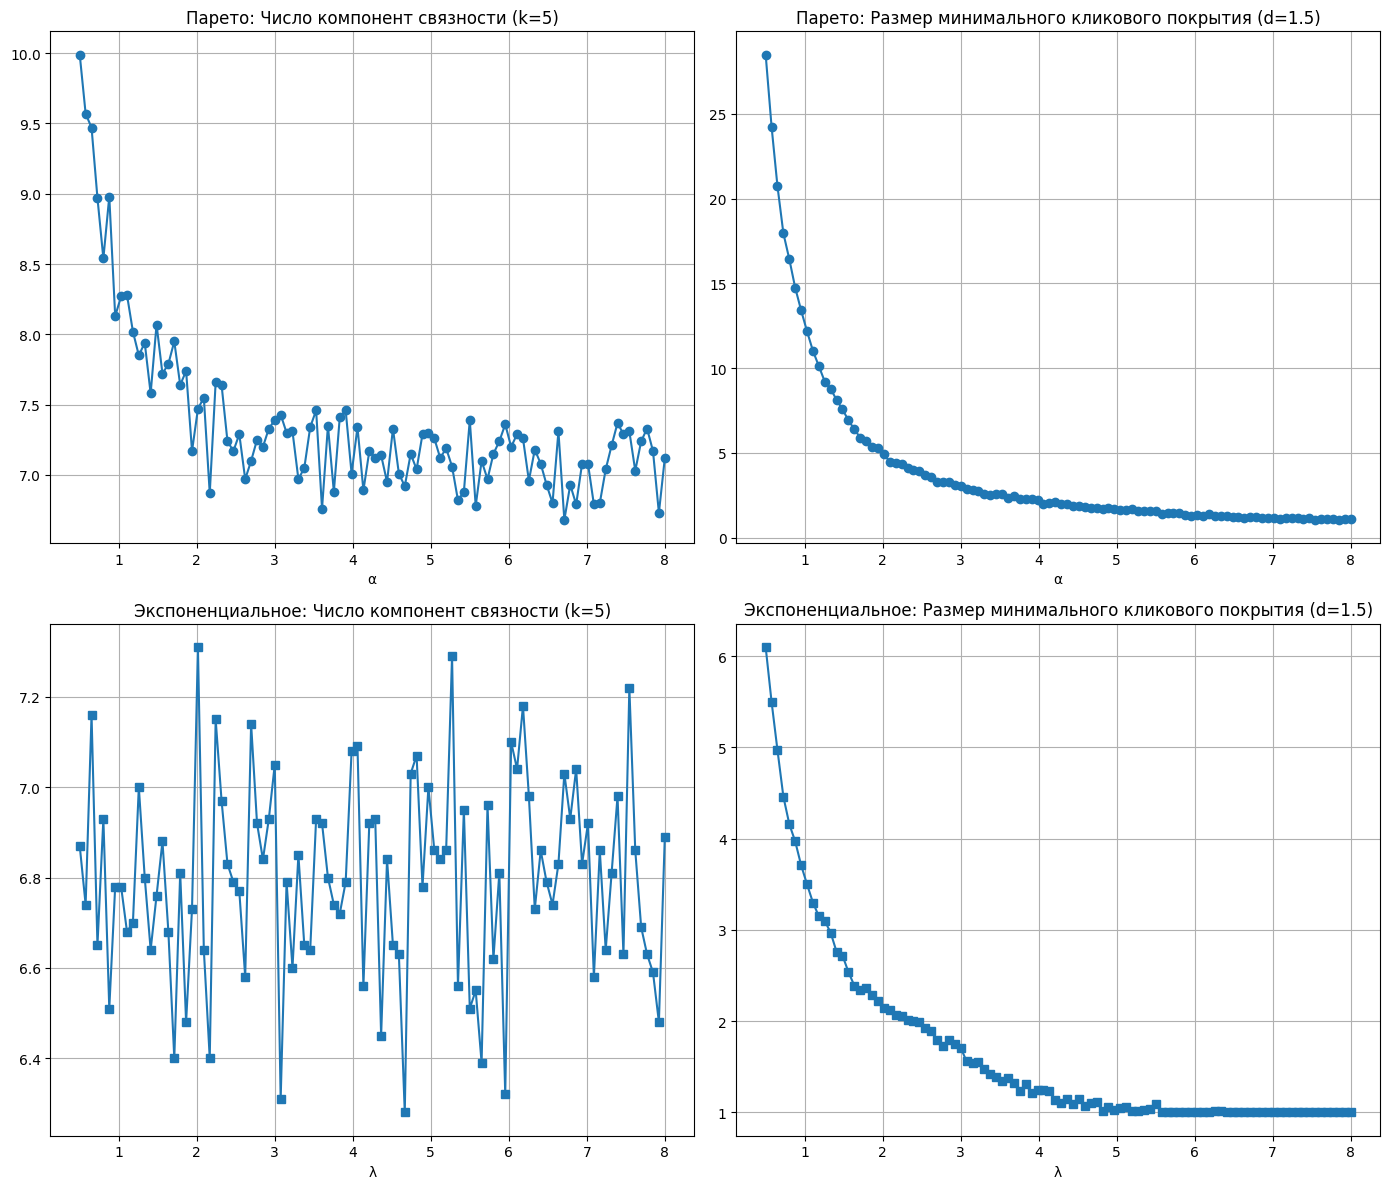

In [5]:
#Визуализация результатов

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Парето: num_components (KNN)
axes[0,0].plot(pareto_alphas, pareto_knn_num_components, marker='o')
axes[0,0].set_title("Парето: Число компонент связности (k=5)")
axes[0,0].set_xlabel("α")
axes[0,0].grid(True)

# Парето: clique_cover_number (dist)
axes[0,1].plot(pareto_alphas, pareto_dist_ccover, marker='o')
axes[0,1].set_title("Парето: Размер минимального кликового покрытия (d=1.5)")
axes[0,1].set_xlabel("α")
axes[0,1].grid(True)

# Экспоненциальное: num_components (KNN)
axes[1,0].plot(exp_lambdas, exp_knn_num_components, marker='s')
axes[1,0].set_title("Экспоненциальное: Число компонент связности (k=5)")
axes[1,0].set_xlabel("λ")
axes[1,0].grid(True)

# Экспоненциальное: clique_cover_number (dist)
axes[1,1].plot(exp_lambdas, exp_dist_ccover, marker='s')
axes[1,1].set_title("Экспоненциальное: Размер минимального кликового покрытия (d=1.5)")
axes[1,1].set_xlabel("λ")
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

Размер выборки (KNN):   0%|          | 0/4 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

Размер выборки (Дистанционный):   0%|          | 0/4 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

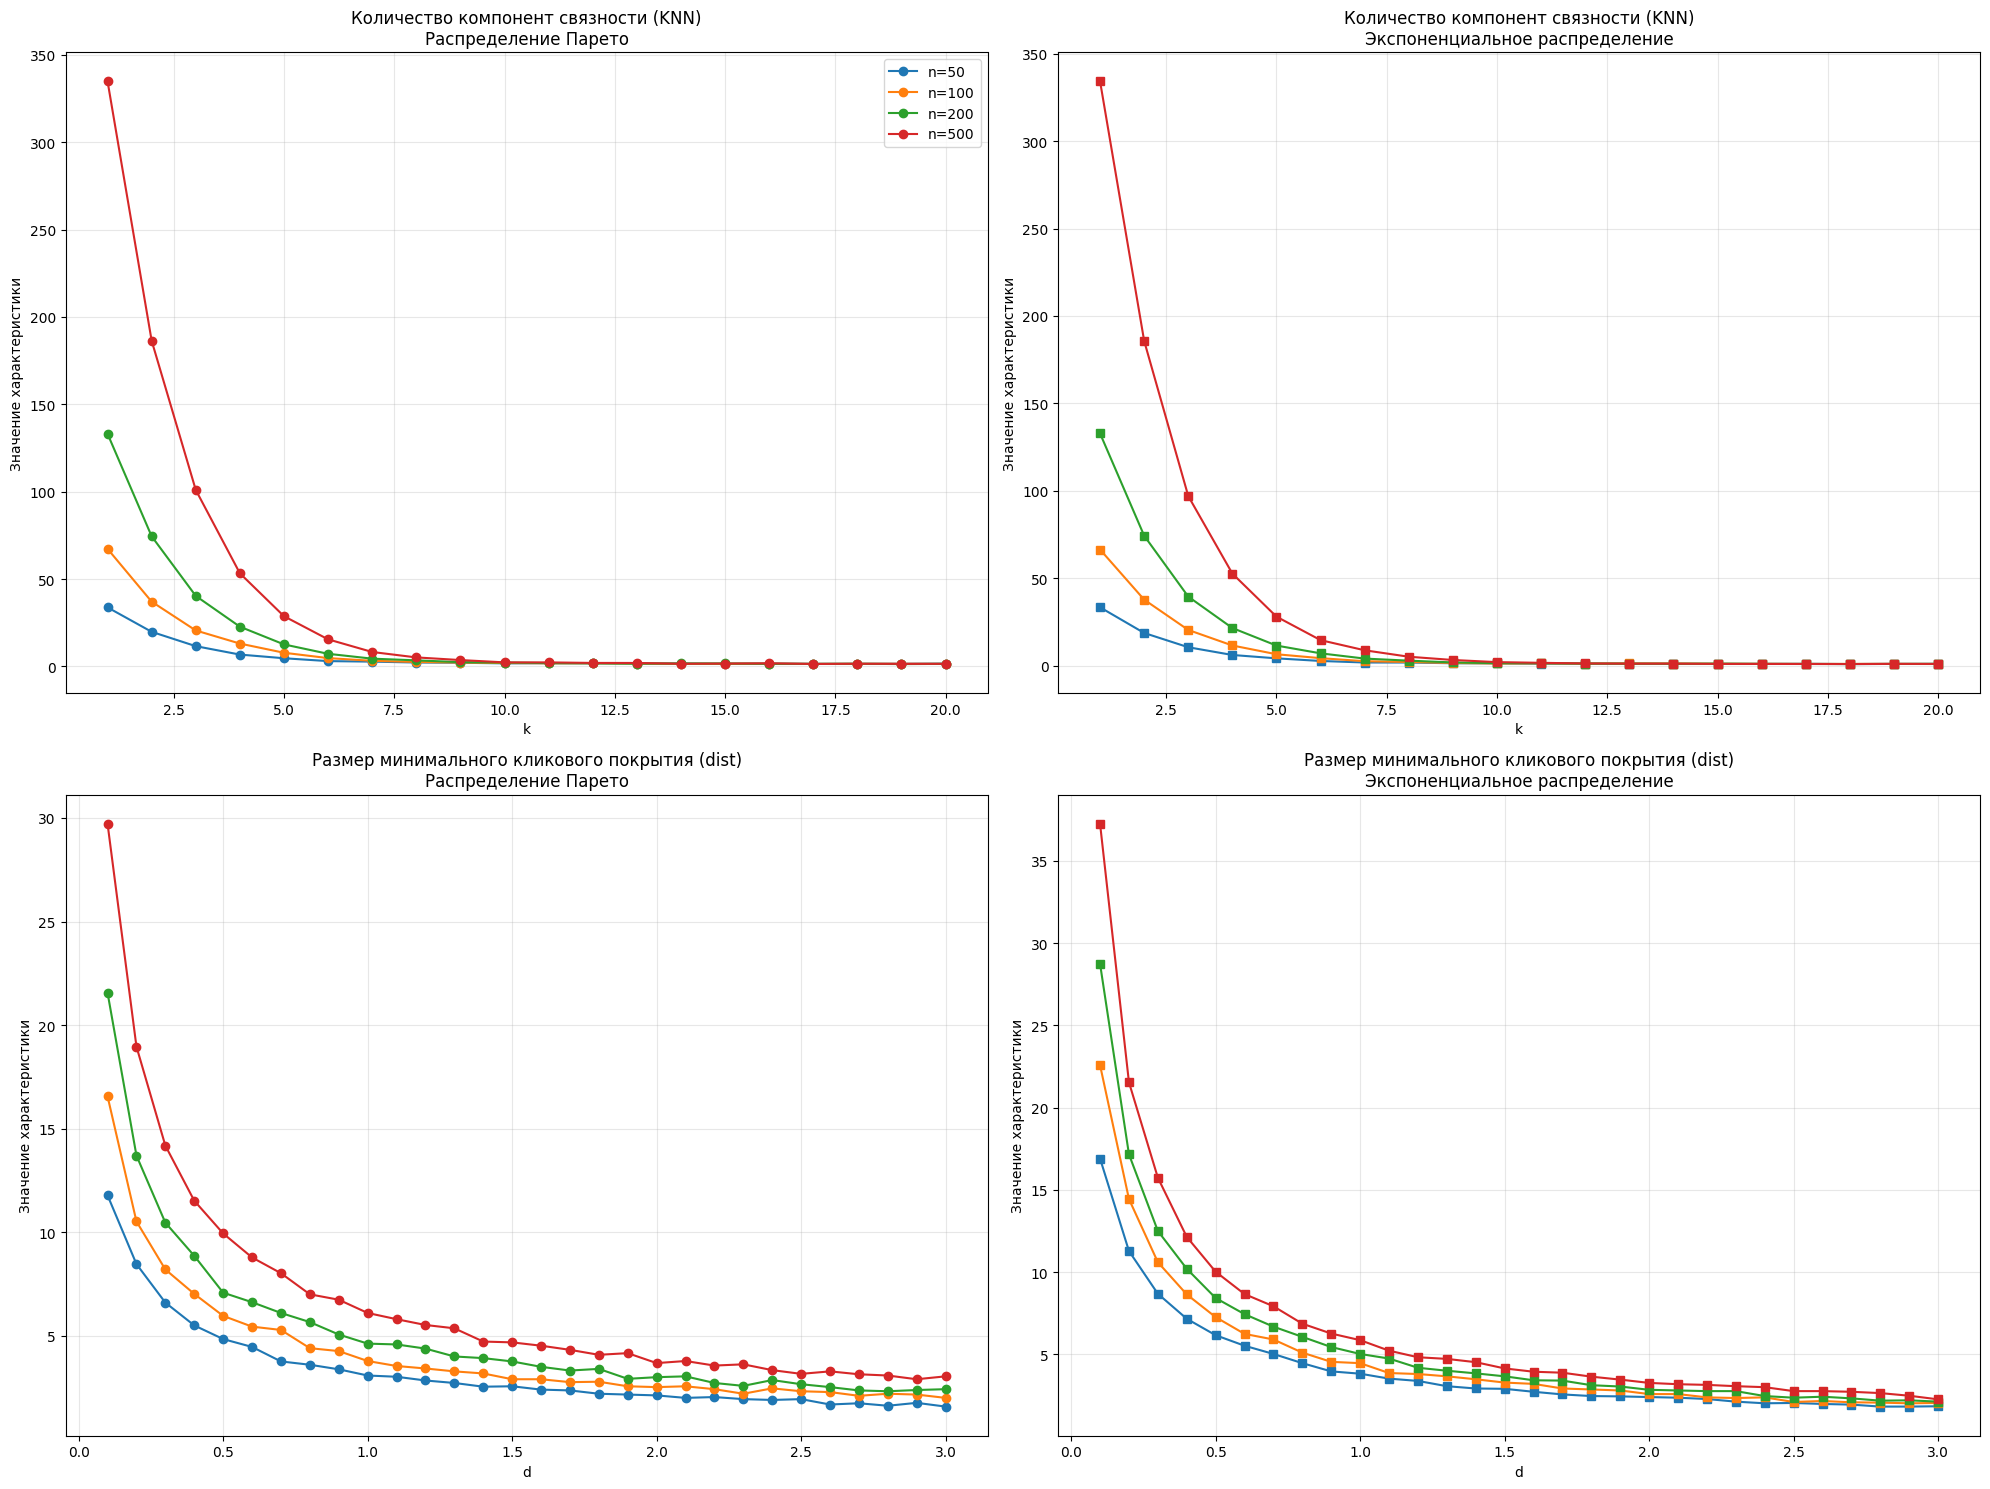

In [6]:
#Посмотрим на изменение значений характеристик графа при изменении параметров построения графа

import numpy as np
import matplotlib.pyplot as plt
from src.graph_builders import build_knn_graph, build_distance_graph
from src.features import compute_feature
from src.simulation import simulate_sample
from tqdm.notebook import tqdm

# Фиксированные параметры распределений
# Для Парето используем α0, для экспоненциального — λ0
PARETO_PARAMS     = {"alpha": alpha0}
EXPONENTIAL_PARAMS = {"lam": lambda0}

# Диапазоны параметров графов и выборок
K_VALUES  = np.arange(1, 21)          # k от 1 до 20
D_VALUES  = np.linspace(0.1, 3.0, 30) # d от 0.1 до 3.0
N_VALUES  = [50, 100, 200, 500]       # Размеры выборок
SIMULATIONS = 50                      # Число симуляций для усреднения

# Результаты для Парето
pareto_knn_results = {n: [] for n in N_VALUES}
pareto_dist_results = {n: [] for n in N_VALUES}

# Результаты для экспоненциального
exp_knn_results = {n: [] for n in N_VALUES}
exp_dist_results = {n: [] for n in N_VALUES}

# Эксперимент для KNN-графа (количество компонент связности)
for n in tqdm(N_VALUES, desc="Размер выборки (KNN)"):
    for k_val in tqdm(K_VALUES, desc="k-параметры", leave=False):
        acc_p = acc_e = 0.0

        # Парето
        for _ in range(SIMULATIONS):
            sample_p = simulate_sample(n, "pareto", PARETO_PARAMS)
            Gp = build_knn_graph(sample_p, int(k_val))
            acc_p += compute_feature(Gp, "num_components")
        pareto_knn_results[n].append(acc_p / SIMULATIONS)

        # Экспоненциальное
        for _ in range(SIMULATIONS):
            sample_e = simulate_sample(n, "exponential", EXPONENTIAL_PARAMS)
            Ge = build_knn_graph(sample_e, int(k_val))
            acc_e += compute_feature(Ge, "num_components")
        exp_knn_results[n].append(acc_e / SIMULATIONS)

# Эксперимент для дистанционного графа (размер минимального кликового покрытия)
for n in tqdm(N_VALUES, desc="Размер выборки (Дистанционный)"):
    for d_val in tqdm(D_VALUES, desc="d-параметры", leave=False):
        acc_p = acc_e = 0.0

        # Парето
        for _ in range(SIMULATIONS):
            sample_p = simulate_sample(n, "pareto", PARETO_PARAMS)
            Gp = build_distance_graph(sample_p, d_val)
            acc_p += compute_feature(Gp, "clique_cover_number")
        pareto_dist_results[n].append(acc_p / SIMULATIONS)

        # Экспоненциальное
        for _ in range(SIMULATIONS):
            sample_e = simulate_sample(n, "exponential", EXPONENTIAL_PARAMS)
            Ge = build_distance_graph(sample_e, d_val)
            acc_e += compute_feature(Ge, "clique_cover_number")
        exp_dist_results[n].append(acc_e / SIMULATIONS)

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# KNN-граф: Парето
for n in N_VALUES:
    axes[0,0].plot(K_VALUES, pareto_knn_results[n], 'o-', label=f'n={n}')
axes[0,0].set_title("Количество компонент связности (KNN)\nРаспределение Парето")
axes[0,0].set_xlabel("k")
axes[0,0].legend()

# KNN-граф: Экспоненциальное
for n in N_VALUES:
    axes[0,1].plot(K_VALUES, exp_knn_results[n], 's-', label=f'n={n}')
axes[0,1].set_title("Количество компонент связности (KNN)\nЭкспоненциальное распределение")
axes[0,1].set_xlabel("k")

# Дистанционный граф: Парето
for n in N_VALUES:
    axes[1,0].plot(D_VALUES, pareto_dist_results[n], 'o-', label=f'n={n}')
axes[1,0].set_title("Размер минимального кликового покрытия (dist)\nРаспределение Парето")
axes[1,0].set_xlabel("d")

# Дистанционный граф: Экспоненциальное
for n in N_VALUES:
    axes[1,1].plot(D_VALUES, exp_dist_results[n], 's-', label=f'n={n}')
axes[1,1].set_title("Размер минимального кликового покрытия (dist)\nЭкспоненциальное распределение")
axes[1,1].set_xlabel("d")

for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_ylabel("Значение характеристики")

plt.tight_layout()
plt.show()
